In [0]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## 对图像进行查看

In [160]:
path = 'https://raw.githubusercontent.com/kevinzhang0216/Coursera-ML-AndrewNg-Notes/master/code/ex2-logistic%20regression/ex2data1.txt'
data = pd.read_csv(path, header = None, names = ['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [161]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


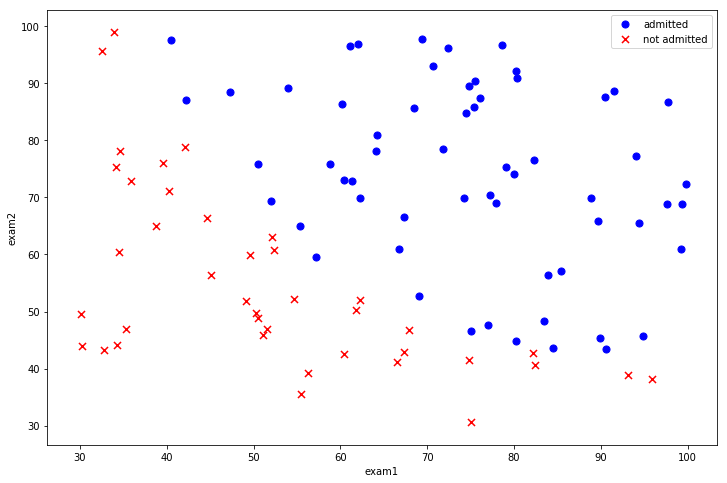

In [162]:
# 显示图像所在波形

# 定义正像数据
positive = data[data['admitted'].isin([1])]
negative = data[data['admitted'].isin([0])]

fig, ax = plt.plt.subplots(figsize = (12, 8))
ax.scatter(positive['exam1'], positive['exam2'], s = 50, c = 'b', marker= 'o', label = 'admitted')
ax.scatter(negative['exam1'], negative['exam2'], s = 50, c = 'r', marker= 'x', label = 'not admitted')
ax.legend()
ax.set_xlabel('exam1')
ax.set_ylabel('exam2')
plt.show()

从图像中可以看出，分界边界可以用线性来表示

## sigmoid 函数学习


In [0]:
# 定义sigmoid函数
def sigmoid(z):
  return 1 / (1 + np.exp(-z)) 

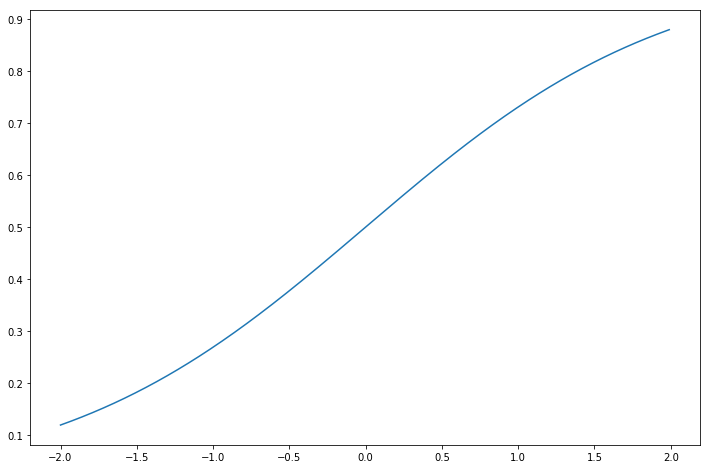

In [183]:
# 查看sigmoid函数的图像

# 定义x的数值
nums = np.arange(-2, 2, 0.01)
y = sigmoid(nums)

fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(nums, y)
plt.show()

In [0]:
'''
fuction: logistics regression cost fuction
input  : x y theta
output : cost
'''
def cost(theta,X , y ):
  X = np.matrix(X)
  y = np.matrix(y)
  theta = np.matrix(theta)
  fisrt = np.multiply(-y, np.log(sigmoid(X * theta.T)))
  second = np.multiply((1-y), np.log(1 - sigmoid(X * theta.T)))
  return np.sum(fisrt - second)/len(X)                     



In [166]:
#def cost(theta, X, y):
    ''' cost fn is -l(theta) for you to minimize'''
#    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

# X @ theta与X.dot(theta)等价

' cost fn is -l(theta) for you to minimize'

In [0]:
data.insert(0, 'ones', 1)
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1 : cols]

X = np.array(X)
y = np.array(y)
theta = np.zeros(3)

In [168]:
data.head()

,ones,exam1,exam2,admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [169]:
# 原始输出loss
cost(theta,X , y  )


0.6931471805599453

## 梯度下降法

In [0]:
'''
fuction:  gradient
input:    X, y, theta
output:   theta
'''
def gradient(theta,X, y):
  X  = np.matrix(X)
  y  = np.matrix(y)
  theta = np.matrix(theta)
  first = sigmoid(X * theta.T) - y
  grad = np.zeros(X.shape[1])
  for i in range(X.shape[1]):
    grad[i] =  np.sum(np.multiply(first, X[:,i]))/len(X)
  return grad
  

In [171]:
gradient(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

## Scipy的全局最优解


In [172]:
import scipy.optimize as opt
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)
res

     fun: 0.20349770246147084
     jac: array([-5.23092506e-06, -2.68075133e-04, -2.92464700e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 29
    njev: 251
  status: 0
 success: True
       x: array([-25.16375526,   0.20625108,   0.2014912 ])

In [0]:
'''
function: 定义预测函数
input：   X，theta
output    y
'''

def predict(X, theta):
  prob = sigmoid(X @ theta)
  return (prob > 0.5).astype(int)

In [182]:
from sklearn.metrics import classification_report
predict_y = predict(X, res.x)
print(classification_report(y, predict_y))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



### 对矩阵进行处理

np.matrix 只改变数据类型



In [151]:
X

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

In [152]:
np.matrix(X)

matrix([[ 1.        , 34.62365962, 78.02469282],
        [ 1.        , 30.28671077, 43.89499752],
        [ 1.        , 35.84740877, 72.90219803],
        [ 1.        , 60.18259939, 86.3085521 ],
        [ 1.        , 79.03273605, 75.34437644],
        [ 1.        , 45.08327748, 56.31637178],
        [ 1.        , 61.10666454, 96.51142588],
        [ 1.        , 75.02474557, 46.55401354],
        [ 1.        , 76.0987867 , 87.42056972],
        [ 1.        , 84.43281996, 43.53339331],
        [ 1.        , 95.86155507, 38.22527806],
        [ 1.        , 75.01365839, 30.60326323],
        [ 1.        , 82.30705337, 76.4819633 ],
        [ 1.        , 69.36458876, 97.71869196],
        [ 1.        , 39.53833914, 76.03681085],
        [ 1.        , 53.97105215, 89.20735014],
        [ 1.        , 69.07014406, 52.74046973],
        [ 1.        , 67.94685548, 46.67857411],
        [ 1.        , 70.66150955, 92.92713789],
        [ 1.        , 76.97878373, 47.57596365],
        [ 1.        

In [153]:
res.x

array([-25.16375526,   0.20625108,   0.2014912 ])

In [154]:
np.matrix(res.x)

matrix([[-25.16375526,   0.20625108,   0.2014912 ]])

## 决策边界

In [184]:
res.x

array([-25.16375526,   0.20625108,   0.2014912 ])

In [185]:
res.x[2]

0.20149119540418686

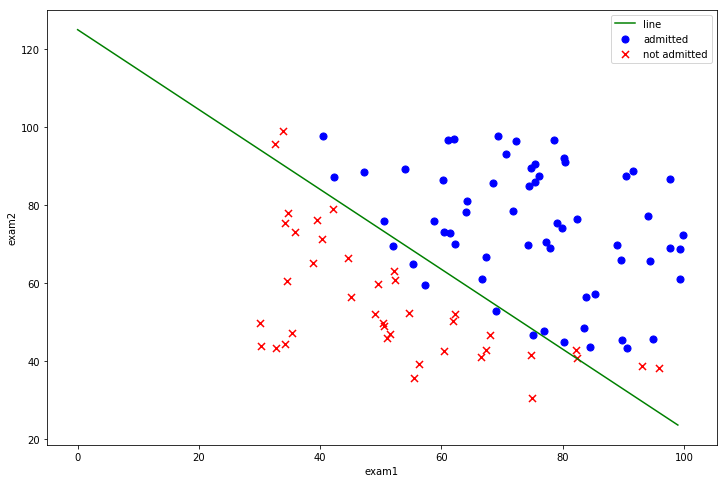

In [189]:
# 对theta与x2 x1的关系进行换算
theta_final = res.x / res.x[2] 
x = np.arange(0,100,1)
y = (-1)*(theta_final[1]*x + theta_final[0])

fig, ax = plt.plt.subplots(figsize = (12, 8))
ax.plot(x, y, 'g', label = 'line')
ax.scatter(positive['exam1'], positive['exam2'], s = 50, c = 'b', marker= 'o', label = 'admitted')
ax.scatter(negative['exam1'], negative['exam2'], s = 50, c = 'r', marker= 'x', label = 'not admitted')
ax.legend()
ax.set_xlabel('exam1')
ax.set_ylabel('exam2')
plt.show()

其中判决门限是为0.5的情况下

## 进一步学习
1. pr曲线
2. 逻辑回归的内涵